In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import MinMaxScaler

In [13]:

# Read in the CSV file using pandas
df = pd.read_csv('data11.csv')

In [14]:
df

,Homogenity,Kurtosis,Correlation,Skewness,Entropy,RMS,Mean,Standard_Deviation,Energy,Contrast,Variance,Output
0,0.960662,15.266355,0.823309,3.358529,3.609497,8.611277,18.732925,39.105572,0.573108,0.456388,1294.854341,1
1,0.954867,12.042898,0.853721,2.849428,4.170216,9.975618,27.064723,47.067766,0.420138,0.523621,2004.468146,1
2,0.960758,8.903400,0.884276,2.386336,3.996901,9.922909,29.477890,51.480671,0.459804,0.481740,2443.327884,1
3,0.976719,5.570027,0.987480,1.956509,2.839669,6.516737,31.075862,63.630226,0.540382,0.097457,2657.972212,1
4,0.966973,3.075216,0.984210,1.267840,3.922062,8.610412,50.705765,79.741854,0.386375,0.184712,4034.105273,1
...,...,...,...,...,...,...,...,...,...,...,...,...
398,0.962738,3.333108,0.967364,1.251144,4.555246,10.167802,50.122040,70.972414,0.339875,0.157950,3483.192466,0
399,0.954041,3.372392,0.953120,1.214767,4.931591,10.993690,47.370056,63.674366,0.315570,0.250123,3311.585020,0
400,0.933813,2.885659,0.886777,1.108409,4.582792,10.586401,54.032267,74.053102,0.314780,0.815119,4917.459593,0
401,0.965171,5.990507,0.935475,2.004759,2.985550,8.017354,29.107671,57.670040,0.537572,0.277083,2971.255470,0


In [15]:
# Separate the target variable and feature matrix
y = df['Output']
X = df.drop('Output', axis=1)

In [16]:
# Fit a Lasso regression model with alpha=0.1
lasso = Lasso(alpha=0.1)
lasso.fit(X, y)

Lasso(alpha=0.1)

In [17]:
# Use mutual_info_classif to compute mutual information scores
mi_scores = mutual_info_classif(X, y)

In [18]:
# Scale scores between 0 and 1 using min-max scaling
scaler = MinMaxScaler()
mi_scores_scaled = scaler.fit_transform(mi_scores.reshape(-1, 1))

In [19]:
# Create an ordered list of attributes based on scores
attr_score = [(col, mi_scores_scaled[i][0]) for i, col in enumerate(X.columns)]
attr_score_sorted = sorted(attr_score, key=lambda x: x[1], reverse=True)
attr_sorted = [attr[0] for attr in attr_score_sorted]
score_sorted = [attr[1] for attr in attr_score_sorted]

In [20]:
# Print the ordered attributes and their corresponding scores as arrays
print("Ordered attributes:")
print(attr_sorted)
print("Ordered scores:")
print(score_sorted)


Ordered attributes:
['Contrast', 'RMS', 'Correlation', 'Skewness', 'Kurtosis', 'Variance', 'Standard_Deviation', 'Entropy', 'Energy', 'Mean', 'Homogenity']
Ordered scores:
[1.0, 0.7629888231403887, 0.5304780985653645, 0.38239207834126504, 0.3221342266661837, 0.2899298325953466, 0.278523184189957, 0.2333741514231556, 0.13142251140900235, 0.006951095727270262, 0.0]


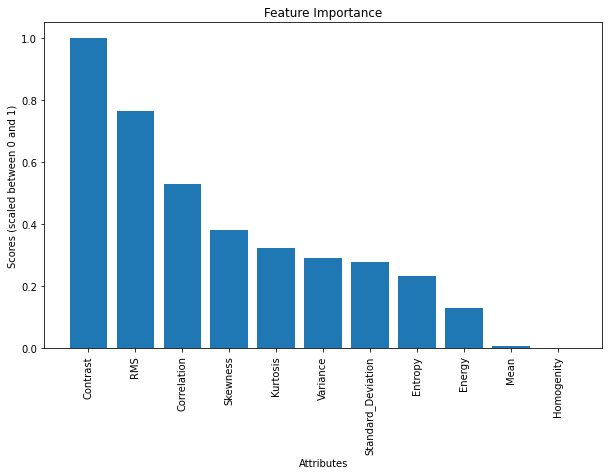

In [21]:
# Plot the scores
plt.figure(figsize=(10, 6))
plt.bar(attr_sorted, score_sorted)
plt.xlabel('Attributes')
plt.ylabel('Scores (scaled between 0 and 1)')
plt.title('Feature Importance')
plt.xticks(rotation=90)
plt.show()